# Overview of character counts

Introduction: xxx characters

Prediction:

Research question:

Conclusion:


-egne notat: Kan endre overskriftene "examining data, visulization" osv til noe mer fagspråklig. Lag kommentarer på alle resultater

# Introduction

We have chosen the Airbnb challenge as our topic. -Explain structure and content of report

# Examining data

Loading the dataset and necessary imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import os
from re import sub
from decimal import Decimal
from sklearn.preprocessing import MultiLabelBinarizer
from scipy import stats

airbnb_uc=pd.read_csv("listings_CPH.csv")

airbnb_uc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6983,Copenhagen 'N Livin',16774,Simon,NaN,Nrrebro,55.686410,12.547410,Entire home/apt,898,3,172,2022-06-21,1.08,1,0,4,NaN
1,26057,Lovely house - most attractive area,109777,Kari,NaN,Indre By,55.693070,12.576490,Entire home/apt,2600,4,59,2022-08-09,0.55,1,303,8,NaN
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,NaN,Indre By,55.676020,12.575400,Entire home/apt,3250,3,300,2022-09-10,2.06,3,56,7,NaN
3,29118,Best Location in Cool Istedgade,125230,Nana,NaN,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725,7,24,2022-08-04,0.16,1,59,2,NaN
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,NaN,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954,3,19,2022-08-22,0.13,1,0,2,NaN


Description of dataset

In [2]:
airbnb_uc.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.381500e+04,1.381500e+04,0.0,13815.000000,13815.000000,13815.000000,13815.000000,13815.000000,12170.000000,13815.000000,13815.000000,13815.000000,0.0
mean,1.719385e+17,1.064145e+08,NaN,55.680569,12.557805,1205.878972,4.605574,18.571118,0.903816,4.400651,93.302642,5.451104,NaN
std,2.852538e+17,1.302801e+08,NaN,0.021088,0.033512,1433.143149,16.900153,36.402671,1.110754,21.298565,123.161958,11.373977,NaN
min,6.983000e+03,1.171800e+04,NaN,55.609510,12.435670,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.907962e+07,1.356383e+07,NaN,55.666110,12.540285,729.000000,2.000000,2.000000,0.230000,1.000000,0.000000,0.000000,NaN
50%,3.931542e+07,4.656301e+07,NaN,55.681190,12.555520,995.000000,3.000000,7.000000,0.530000,1.000000,20.000000,3.000000,NaN
75%,5.665348e+17,1.553486e+08,NaN,55.695770,12.580741,1368.500000,4.000000,20.000000,1.120000,1.000000,174.000000,6.000000,NaN
max,7.222925e+17,4.805803e+08,NaN,55.742800,12.651740,64900.000000,1111.000000,711.000000,24.020000,179.000000,365.000000,471.000000,NaN


Checking for null values in each column

In [3]:
airbnb_uc.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               13815
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        1645
reviews_per_month                  1645
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           13815
dtype: int64

Removing columns containing non-relevant data and replacing the null values in reviews per month with zero

In [4]:
airbnb_uc.drop(columns=["id", "name","host_id", "neighbourhood_group","license","host_name","last_review"], inplace=True, axis=1)
airbnb_uc.fillna({'reviews_per_month':0}, inplace=True)

# Visualization

Seeing if our data contains wrongful information or irregularities using boxplots for all numeric columns, plotted using log

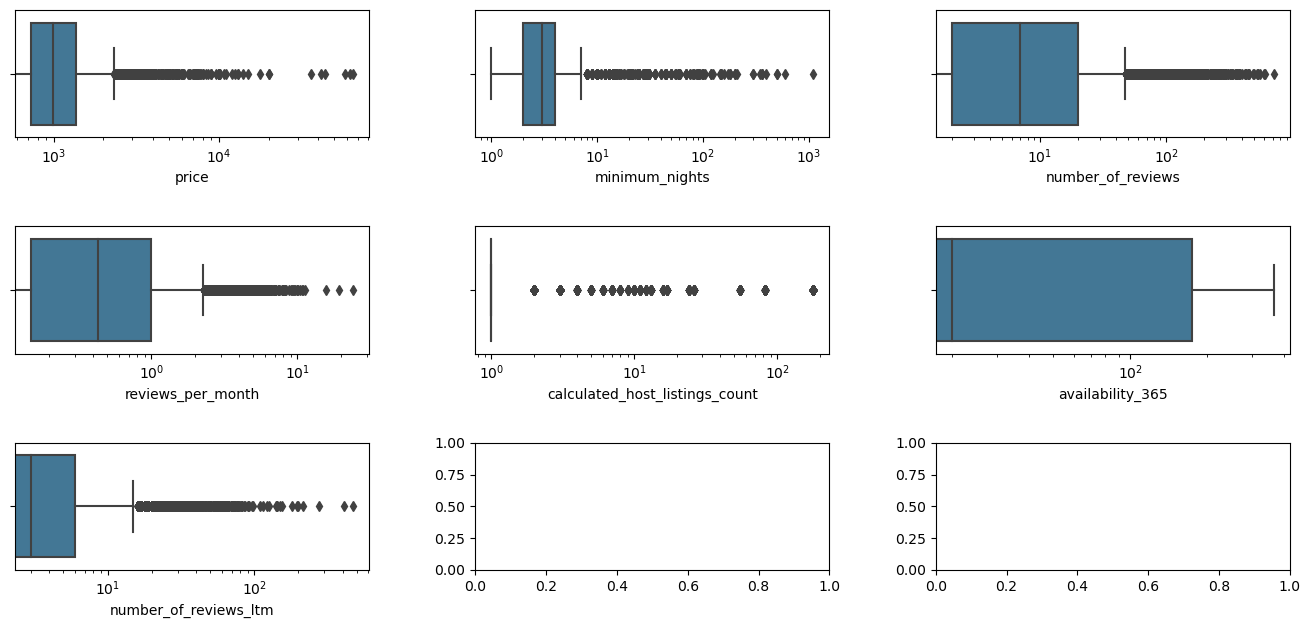

In [5]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9]] = plt.subplots(3,3, figsize=(15,7))
plt.subplots_adjust(left=0.05 , bottom=0.1, right=0.9 , top=0.9, wspace=0.3, hspace=0.7)

ax1.set_xscale("log")
ax2.set_xscale("log")
ax3.set_xscale("log")
ax4.set_xscale("log")
ax5.set_xscale("log")
ax6.set_xscale("log")
ax7.set_xscale("log")



sns.boxplot(data=airbnb_uc, x='price',
            palette='mako',ax=ax1)
sns.boxplot(data=airbnb_uc,x='minimum_nights',
            palette='mako',ax=ax2)
sns.boxplot(data=airbnb_uc, x='number_of_reviews',
            palette='mako',ax=ax3)
sns.boxplot(data=airbnb_uc, x='reviews_per_month',
            palette='mako',ax=ax4)
sns.boxplot(data=airbnb_uc,x='calculated_host_listings_count',
            palette='mako',ax=ax5)
sns.boxplot(data=airbnb_uc, x='availability_365',
            palette='mako',ax=ax6)
sns.boxplot(data=airbnb_uc, x='number_of_reviews_ltm',
            palette='mako',ax=ax7)

plt.show()

From plot above it can be seen that columns for price and minimum nights are containing outliers. For price, Isolation Forest is used to identifying the outliers by isolating them in the data. Isolation Forest isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. A value of -1 means that the value is an outlier.

In [58]:
from sklearn.ensemble import IsolationForest

airbnb_uc[['price']].head()
model = IsolationForest(n_estimators=100, max_samples="auto", contamination=0.01)
model.fit(airbnb_uc[['price']])
airbnb_uc['price_scores'] = model.decision_function(airbnb_uc[['price']])
airbnb_uc['price_anomaly'] = model.predict(airbnb_uc[['price']])
airbnb_clean = airbnb_uc.loc[airbnb_uc['price_anomaly'] == 1]
airbnb_clean.drop(['price_scores','price_anomaly'], axis=1, inplace=True)

len(airbnb_uc.loc[airbnb_uc['price_anomaly'] == -1])
len(airbnb_uc.loc[(airbnb_uc['price'] > 5000) & (airbnb_uc['price_anomaly']==-1)])

139

By running Isolation Tree on a contamination of 0.01, 139 price anomalies have been detected and removed from the dataset. The maximum price for an airbnb in the dataset is now 5686. - Remove outliers for minimum nights

Min price value = 1
Max price value = 10 000?

by inspecting data i can see price over 10k is false

Diskuter hvorfor det er så mange availibility values med 0, might be outliers, but also may be booked so will not remove them